In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("../new data/fix__excelfile_end (1).xlsx")
df

,timestemp,playtime,uniquecode,productcode,productname,category,price,profit,small_category
0,2019-08-26 00:20:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,12078000,마스크팩/리프팅팩트
1,2019-08-26 00:40:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,17338000,마스크팩/리프팅팩트
2,2019-08-26 01:00:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,18195000,마스크팩/리프팅팩트
3,2019-08-30 01:00:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,5905000,마스크팩/리프팅팩트
4,2019-08-30 01:20:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,11888000,마스크팩/리프팅팩트
...,...,...,...,...,...,...,...,...,...
37367,2019-11-14 17:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,55718000,쌀/잡곡
37368,2019-12-05 15:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,52542000,쌀/잡곡
37369,2019-12-11 15:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,45331000,쌀/잡곡
37370,2019-12-14 17:40:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,51303000,쌀/잡곡


In [3]:
import re
def text_processing_first(df1):
    df1["p_name"] = df1.productname.str.replace("(","A")
    df1["p_name"] = df1.p_name.str.replace(")","A")
    df1["p_name"] = df1.p_name.str.upper()
    # (A무A) 인 상품 무이자 일시불로 통일 시킨다.
    df1["p_name"] = df1.p_name.apply(lambda x: re.sub("(A무A)","무이자 ",x))
    df1["p_name"] = df1.p_name.apply(lambda x: re.sub("(A일A)","일시불 ",x))
    df["p_name"]=df["p_name"].apply(lambda x: re.sub("[LG]","엘지 ",x))
    df["p_name"]=df["p_name"].apply(lambda x: re.sub("[TV]","텔레비전",x))
    # 영어 제거
    df1["p_name"] = df1.p_name.apply(lambda x: re.sub("[A-Za-z0-9]","",x))

    # 불용어(@,#,-,+,=) 문자 삭제
    df1["p_name"] = df1.p_name.apply(lambda x: re.sub("[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]","",x))
    return df1

In [4]:
df=text_processing_first(df)
df

,timestemp,playtime,uniquecode,productcode,productname,category,price,profit,small_category,p_name
0,2019-08-26 00:20:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,12078000,마스크팩/리프팅팩트,엘로엘 아쿠아클린 마스크
1,2019-08-26 00:40:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,17338000,마스크팩/리프팅팩트,엘로엘 아쿠아클린 마스크
2,2019-08-26 01:00:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,18195000,마스크팩/리프팅팩트,엘로엘 아쿠아클린 마스크
3,2019-08-30 01:00:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,5905000,마스크팩/리프팅팩트,엘로엘 아쿠아클린 마스크
4,2019-08-30 01:20:00,20.0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,11888000,마스크팩/리프팅팩트,엘로엘 아쿠아클린 마스크
...,...,...,...,...,...,...,...,...,...,...
37367,2019-11-14 17:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,55718000,쌀/잡곡,멋진밥상 흥양농협 햅쌀 엘지
37368,2019-12-05 15:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,52542000,쌀/잡곡,멋진밥상 흥양농협 햅쌀 엘지
37369,2019-12-11 15:00:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,45331000,쌀/잡곡,멋진밥상 흥양농협 햅쌀 엘지
37370,2019-12-14 17:40:00,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,51303000,쌀/잡곡,멋진밥상 흥양농협 햅쌀 엘지


In [5]:
pd.DataFrame(df["p_name"].value_counts()).reset_index()

,index,p_name
0,일시불 엘지 엘지 울트라 텔레비전텔레비전,1264
1,무이자 엘지 엘지 울트라 텔레비전텔레비전,1260
2,무이자 쿠쿠전기밥솥 인용,485
3,한일 대용량 스텐 분쇄믹서기,401
4,일시불 쿠쿠전기밥솥 인용,338
...,...,...
1533,일시불 실리만 하이브리드 냄비후라이팬 풀세트,2
1534,여성 벤치코트,2
1535,메이듀 남성 린넨 블렌디드 슬립온,2
1536,무이자 한샘 하이바스 내추럴 기본형,2


In [6]:
df1=df[["p_name","small_category","price"]].groupby(["p_name","small_category","price"]).agg("count").reset_index()
df1.columns = ["productname1","small_category","price"]
df1

,productname1,small_category,price
0,남성 화이트라벨 폴로셔츠 종,티셔츠/스웨터,79000
1,여성 화이트라벨 폴로셔츠 종,티셔츠/스웨터,79000
2,남성 리버시블 자켓,아우터,69000
3,남성 멀티패키지 종 세트,상하세트,129000
4,남성 트레킹화 종,캐주얼화,49800
...,...,...,...
1847,효재 화원 자수 광목워싱 침구세트 킹,침구/커튼/카페트,179000
1848,히트융 극세사 퍼융기모 남성 동내의 패키지,언더웨어,49900
1849,히트융 극세사 퍼융기모 남성 동내의 패키지,언더웨어,69900
1850,히트융 극세사 퍼융기모 여성 동내의 패키지,언더웨어,49900


In [7]:
df1

,productname1,small_category,price
0,남성 화이트라벨 폴로셔츠 종,티셔츠/스웨터,79000
1,여성 화이트라벨 폴로셔츠 종,티셔츠/스웨터,79000
2,남성 리버시블 자켓,아우터,69000
3,남성 멀티패키지 종 세트,상하세트,129000
4,남성 트레킹화 종,캐주얼화,49800
...,...,...,...
1847,효재 화원 자수 광목워싱 침구세트 킹,침구/커튼/카페트,179000
1848,히트융 극세사 퍼융기모 남성 동내의 패키지,언더웨어,49900
1849,히트융 극세사 퍼융기모 남성 동내의 패키지,언더웨어,69900
1850,히트융 극세사 퍼융기모 여성 동내의 패키지,언더웨어,49900


In [8]:
from konlpy.tag import Okt
import re
# konlpy가 버전이 업데이트가 되면서 Okt가 twitter의 상위버전이 되어버렸다.
twitter = Okt()

In [9]:
twitter.pos("텔레비전")

[('텔레비전', 'Noun')]

In [10]:
def remove_len_1(data):
    word=[]
    for x in data:
        if(len(x) <=1):
            pass
        else:
            word.append(x)
    return word

In [11]:
df1["productname1"] = df1.productname1.apply(lambda x: twitter.nouns(x))
df1["productname1"] =  df1["productname1"].apply(lambda x: " ".join(remove_len_1(x)))

In [12]:
df1

,productname1,small_category,price
0,남성 화이트 라벨 폴로셔츠,티셔츠/스웨터,79000
1,여성 화이트 라벨 폴로셔츠,티셔츠/스웨터,79000
2,남성 리버시 자켓,아우터,69000
3,남성 멀티 패키지 세트,상하세트,129000
4,남성 트레킹,캐주얼화,49800
...,...,...,...
1847,효재 화원 자수 광목 워싱 침구 세트,침구/커튼/카페트,179000
1848,히트 극세사 융기 남성 내의 패키지,언더웨어,49900
1849,히트 극세사 융기 남성 내의 패키지,언더웨어,69900
1850,히트 극세사 융기 여성 내의 패키지,언더웨어,49900


In [13]:
df1= df1[["productname1","small_category","price"]]
df1.head()

,productname1,small_category,price
0,남성 화이트 라벨 폴로셔츠,티셔츠/스웨터,79000
1,여성 화이트 라벨 폴로셔츠,티셔츠/스웨터,79000
2,남성 리버시 자켓,아우터,69000
3,남성 멀티 패키지 세트,상하세트,129000
4,남성 트레킹,캐주얼화,49800


In [14]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import string,os

In [74]:
X = df1[["productname1","price"]].values
y = df1["small_category"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=2)
print("Shape of Train Set:", X_train.shape, y_train.shape)
print("Shape of Test Set:", X_test.shape, y_test.shape)

Shape of Train Set: (1666, 2) (1666,)
Shape of Test Set: (186, 2) (186,)


In [75]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [76]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("1단계")
    assert tf.config.experimental.get_memory_growth(physical_devices[0],True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
    print("12312")
    pass

Num GPUs: 1
1단계
12312


In [77]:
X_train_name = X_train[:,0]
X_train_price = tf.constant(X_train[:,1],dtype=tf.float64)
X_test_name = X_test[:,0]
X_test_price = tf.constant(X_test[:,1],dtype=tf.float64)

In [78]:
tokenizer_obj = tf.keras.preprocessing.text.Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') # _ has been removed from filters hence it will be preserved
tokenizer_obj.fit_on_texts(X_train_name)

word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

#Encoded Documents
train_sequences = tokenizer_obj.texts_to_sequences(X_train_name)
test_sequences = tokenizer_obj.texts_to_sequences(X_test_name)

print("Train Sequences Length", len(train_sequences))
print("Test Sequences Length", len(test_sequences))

#Selecting max_length of words in a mail
print("Around 96 percentile of mails have length of words less than ", np.percentile(pd.Series(train_sequences).apply(lambda x: len(x)), 96)) 

Found 1478 unique tokens.
Train Sequences Length 1666
Test Sequences Length 186
Around 96 percentile of mails have length of words less than  8.0


**Explanation for Sequence Length**

*1) We have observed here that around 90 percent of sentences have length less than 7 hence we have taken MAX_SEQUENCE_LENGTH to be 7. Words after this length will be trimmed off.*

In [79]:
#Padding of Word Sequences
MAX_SEQUENCE_LENGTH = 10
vocab_size = len(word_index)+1
train_sequences_pad = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_sequences_pad = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print("Shape of padded train sequences: ", train_sequences_pad.shape)
print("Shape of padded test sequences: ", test_sequences_pad.shape)

Shape of padded train sequences:  (1666, 10)
Shape of padded test sequences:  (186, 10)


In [82]:
#One-Hot Encoding Output Variable
from sklearn.preprocessing import OneHotEncoder
encoder_onehot = OneHotEncoder()
encoder_onehot.fit(y_train.reshape(-1, 1))
y_train_encoded = encoder_onehot.transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded = encoder_onehot.transform(y_test.reshape(-1, 1)).toarray()

In [71]:
#y_test_encoded.shape (170, 94)

In [23]:
y_test_encoded.shape

(186, 94)

In [24]:
#Early Stopping, Saving best model and Micro Averaged F1 Score callbacks

#*--*Save your model at every epoch if your accuracy is improved from previous epoch.*--*
filepath="../checkpoint/best_model_1.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='accuracy',  verbose=1, save_best_only=True, save_weights_only=True, mode='auto')

#*--*Early Stopping*--*
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=2, verbose=1, mode='auto')

#*--*Using tensorboard to analyze models*--*
log_dir="../logs/Text-CNN-Model"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)
writer = tf.summary.create_file_writer(log_dir)

In [ ]:
#*--*Micro Average F1-Score*--*
class custom_Callback(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.history={'loss': [], 'acc': [], 'val_loss': [], 'val_acc': [], 'val_f1' : [], 'val_AUC' : []}
        self.train_data = train_sequences_pad
        self.train_target = y_train_encoded
        self.validation_data = test_sequences_pad
        self.validation_target = y_test_encoded
        
    def on_epoch_end(self, epoch, logs={}):
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('acc'))
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('accuracy', -1) != -1:
            self.history['val_acc'].append(logs.get('accuracy'))

        #Calculating and appending f1_score
        val_predict = (np.asarray(self.model.predict(self.validation_data))).round()
        val_targ = self.validation_target
        train_predict = (np.asarray(self.model.predict(self.train_data))).round()
        train_targ = self.train_target
        _train_f1 = f1_score(train_targ, train_predict, average='micro')
        _val_f1 = f1_score(val_targ, val_predict, average='micro')
        self.history['val_f1'].append(_val_f1)
        print("\nF1 Score Train: %f " %(_train_f1))
        print("\nF1 Score Validation: %f " %(_val_f1))

custom=custom_Callback()

<h1>Model-1: Using 1D convolutions with word embeddings<h1>

In [25]:
#Creating Embedding Layer
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            100,
                                            input_length=MAX_SEQUENCE_LENGTH,
                                            trainable=False)

In [ ]:
# def create_model():
#     input_price_shape = tf.keras.layers.Input(shape=(1,))
#     input_shape = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
#     embedded_sequences = embedding_layer(input_shape)
#     ### embedded_sequences.shape - > TensorShape([None, 10, 100])
    
#     tower_1 = tf.keras.layers.Conv1D(128, 1, activation='relu')(embedded_sequences) #Kernel Size(M) = 1
#     tower_2 = tf.keras.layers.Conv1D(128, 3, activation='relu')(embedded_sequences) #Kernel Size(N) = 3
#     tower_3 = tf.keras.layers.Conv1D(128, 5, activation='relu')(embedded_sequences) #Kernel Size(O) = 5
#     # tower_1.shape,tower_2.shape,tower_3.shape -> (TensorShape([None, 10, 64]), TensorShape([None, 8, 64]), TensorShape([None, 6, 64]))
    
#     concat = tf.keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
#     # concat.shape -> TensorShape([None, 24, 64])
    
#     max_pool = tf.keras.layers.MaxPooling1D(3)(concat)#3
#     # max_pool.shape -> TensorShape([None, 8, 64])
    
#     tower_1a = tf.keras.layers.Conv1D(64, 3, activation='relu')(max_pool) #Kernel Size(i) = 3
#     tower_2b = tf.keras.layers.Conv1D(64, 5, activation='relu')(max_pool) #Kernel Size(j) = 5
#     tower_3c = tf.keras.layers.Conv1D(64, 7, activation='relu')(max_pool) #Kernel Size(k) = 7 
#     # tower_1a.shape,tower_2b.shape,tower_3c.shape -> (TensorShape([None, 6, 64]), TensorShape([None, 4, 64]), TensorShape([None, 2, 64]))
    
#     concat2 = tf.keras.layers.concatenate([tower_1a, tower_2b, tower_3c], axis=1)
#     # concat2.shape -> TensorShape([None, 12, 64])
    
#     max_pool2 = tf.keras.layers.MaxPooling1D(2)(concat2)#2
#     # max_pool2.shape -> TensorShape([None, 6, 64])
    
#     convP = tf.keras.layers.Conv1D(64, 3, activation='relu')(max_pool2) #Kernel Size(P) = 3
#     # convP.shape ->TensorShape([None, 4, 64])
    
#     flatten = tf.keras.layers.Flatten()(convP)
#     # flatten.shape -> TensorShape([None, 256])
    
#     price_dense = tf.keras.layers.Dense(32,activation='tanh')(input_price_shape)
    
#     dropout = tf.keras.layers.Dropout(0.7)(flatten) #Taking Dropout Rate = 0.3
#     dense = tf.keras.layers.Dense(256,activation='relu')(dropout) #128
#     cat_dense = tf.keras.layers.concatenate([dense, price_dense], axis=1)
#     cat_dense = tf.keras.layers.Dense(64,activation='relu')(cat_dense)
    
#     preds = tf.keras.layers.Dense(94, activation='softmax')(cat_dense)

#     model_created = tf.keras.models.Model(input_shape,input_price_shape, preds)
#     return model_created

In [44]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            100,
                                            input_length=MAX_SEQUENCE_LENGTH,
                                            trainable=False)

input_price_shape = tf.keras.layers.Input(shape=(1,))
input_shape = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
embedded_sequences = embedding_layer(input_shape)
### embedded_sequences.shape - > TensorShape([None, 10, 100])

tower_1 = tf.keras.layers.Conv1D(128, 1, activation='relu')(embedded_sequences) #Kernel Size(M) = 1
tower_2 = tf.keras.layers.Conv1D(128, 3, activation='relu')(embedded_sequences) #Kernel Size(N) = 3
tower_3 = tf.keras.layers.Conv1D(128, 5, activation='relu')(embedded_sequences) #Kernel Size(O) = 5
# tower_1.shape,tower_2.shape,tower_3.shape -> (TensorShape([None, 10, 64]), TensorShape([None, 8, 64]), TensorShape([None, 6, 64]))

concat = tf.keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
# concat.shape -> TensorShape([None, 24, 64])

max_pool = tf.keras.layers.MaxPooling1D(3)(concat)#3
# max_pool.shape -> TensorShape([None, 8, 64])

tower_1a = tf.keras.layers.Conv1D(64, 3, activation='relu')(max_pool) #Kernel Size(i) = 3
tower_2b = tf.keras.layers.Conv1D(64, 5, activation='relu')(max_pool) #Kernel Size(j) = 5
tower_3c = tf.keras.layers.Conv1D(64, 7, activation='relu')(max_pool) #Kernel Size(k) = 7 
# tower_1a.shape,tower_2b.shape,tower_3c.shape -> (TensorShape([None, 6, 64]), TensorShape([None, 4, 64]), TensorShape([None, 2, 64]))

concat2 = tf.keras.layers.concatenate([tower_1a, tower_2b, tower_3c], axis=1)
# concat2.shape -> TensorShape([None, 12, 64])

max_pool2 = tf.keras.layers.MaxPooling1D(2)(concat2)#2
# max_pool2.shape -> TensorShape([None, 6, 64])

convP = tf.keras.layers.Conv1D(64, 3, activation='relu')(max_pool2) #Kernel Size(P) = 3
# convP.shape ->TensorShape([None, 4, 64])

flatten = tf.keras.layers.Flatten()(convP)
# flatten.shape -> TensorShape([None, 256])

price_dense = tf.keras.layers.Dense(32,activation='tanh')(input_price_shape)

dropout = tf.keras.layers.Dropout(0.7)(flatten) #Taking Dropout Rate = 0.3
dense = tf.keras.layers.Dense(256,activation='relu')(dropout) #128
cat_dense = tf.keras.layers.concatenate([dense, price_dense], axis=1)
cat_dense = tf.keras.layers.Dense(64,activation='relu')(cat_dense)

preds = tf.keras.layers.Dense(94, activation='softmax')(cat_dense)

model_created = tf.keras.models.Model([input_shape,input_price_shape], preds)

In [45]:
model_created.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 10, 100)      147900      input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 10, 128)      12928       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 8, 128)       38528       embedding_2[0][0]                
____________________________________________________________________________________________

In [46]:
# #Calling create_model method and printing summary of model
# model = create_model()
# model.summary()

In [47]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model_created.compile(loss='categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

In [48]:
hist=model_created.fit([train_sequences_pad,X_train_price], y_train_encoded, validation_data=([test_sequences_pad,X_test_price] ,y_test_encoded), epochs=50, batch_size=32)

Epoch 1/50
53/53 [==============================] - 0s 8ms/step - loss: 4.1198 - accuracy: 0.0846 - val_loss: 3.7704 - val_accuracy: 0.0591
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 3.7397 - accuracy: 0.0924 - val_loss: 3.5168 - val_accuracy: 0.1129
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 3.4646 - accuracy: 0.1447 - val_loss: 3.1915 - val_accuracy: 0.1989
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 3.1281 - accuracy: 0.2227 - val_loss: 2.7629 - val_accuracy: 0.3172
Epoch 5/50
53/53 [==============================] - 0s 4ms/step - loss: 2.6906 - accuracy: 0.3325 - val_loss: 2.3947 - val_accuracy: 0.4194
Epoch 6/50
53/53 [==============================] - 0s 4ms/step - loss: 2.2928 - accuracy: 0.4136 - val_loss: 1.9745 - val_accuracy: 0.5161
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 1.9244 - accuracy: 0.5078 - val_loss: 1.7445 - val_accuracy: 0.5699
Epoch 8/50
53/53 [==

In [52]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

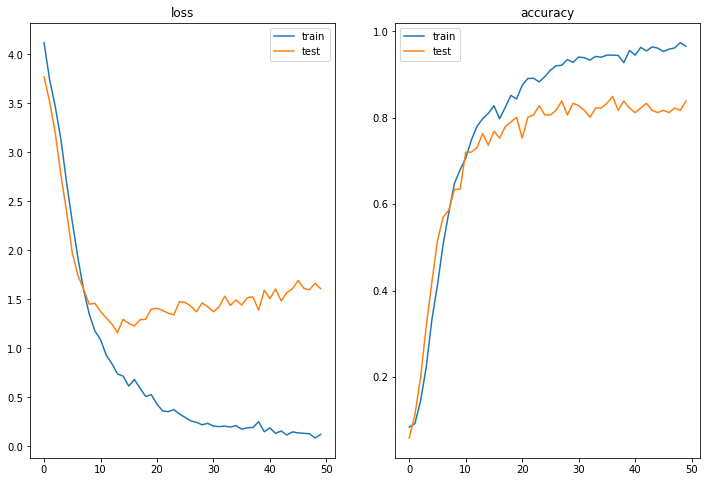

In [58]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12,8)

ax1.plot(hist.history["loss"],label="train")
ax1.plot(hist.history["val_loss"],label="test")
ax1.set_title("loss")
ax1.legend()


ax2.plot(hist.history["accuracy"],label="train")
ax2.plot(hist.history["val_accuracy"],label="test")
ax2.set_title("accuracy")
ax2.legend()

In [35]:
scores = model_created.evaluate([test_sequences_pad,X_test_price],y_test_encoded, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_label = (np.asarray(model_created.predict([test_sequences_pad,X_test_price]))).round()
print("F1 SCore: ", f1_score(y_test_encoded, y_label, average='micro'))

Accuracy: 83.33%
F1 SCore:  0.8645533141210374


In [37]:
model_created.save('../model/my_model.h5')

In [40]:
model_created.load_weights("../model/my_model.h5")

In [43]:
scores = model_created.evaluate([test_sequences_pad,X_test_price],y_test_encoded, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_label = (np.asarray(model_created.predict([test_sequences_pad,X_test_price]))).round()
print("F1 SCore: ", f1_score(y_test_encoded, y_label, average='micro'))

Accuracy: 83.33%
F1 SCore:  0.8645533141210374


소규모 카테고리를 분류

In [59]:
y_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
vv=pd.DataFrame(X_test)
vv

,0,1
0,남영 비비안 노르 컬렉션 프리미엄 브라,99900
1,레이 프릴 퍼펙트 란쥬 패키지,49900
2,에코 일리 프라이팬 세트,50900
3,무한 하이 바스 내추럴 하부 장형,3690000
4,곡물 그대로 리지,39900
...,...,...
181,보몽 엘리 소프트 란넬 침구 세트,49900
182,레스 토닉 블루투스 엘지 서랍 침대,649000
183,보루 네오 루나 시즌 유로 멀티 수납 엘지 침대 슈퍼 싱글,548000
184,프라다 카드 카메라 크로스,790000


In [87]:
vv["new_small_category"]=encoder_onehot.inverse_transform(y_label)

In [89]:
vv

,0,1,new_small_category
0,남영 비비안 노르 컬렉션 프리미엄 브라,99900,언더웨어
1,레이 프릴 퍼펙트 란쥬 패키지,49900,언더웨어
2,에코 일리 프라이팬 세트,50900,주방용품
3,무한 하이 바스 내추럴 하부 장형,3690000,욕실용품
4,곡물 그대로 리지,39900,TV
...,...,...,...
181,보몽 엘리 소프트 란넬 침구 세트,49900,침구/커튼/카페트
182,레스 토닉 블루투스 엘지 서랍 침대,649000,시공가구
183,보루 네오 루나 시즌 유로 멀티 수납 엘지 침대 슈퍼 싱글,548000,시공가구
184,프라다 카드 카메라 크로스,790000,여성가방
